In [2]:
import sys

sys.path.append("..")

from symphony import loss, models
import jax
import jax.numpy as jnp


/Users/ameyad/Documents/spherical-harmonic-net/.venv/lib/python3.10/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/Users/ameyad/Documents/spherical-harmonic-net/.venv/lib/python3.10/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/Users/ameyad/Documents/spherical-harmonic-net/.venv/lib/python3.10/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


0.019047618


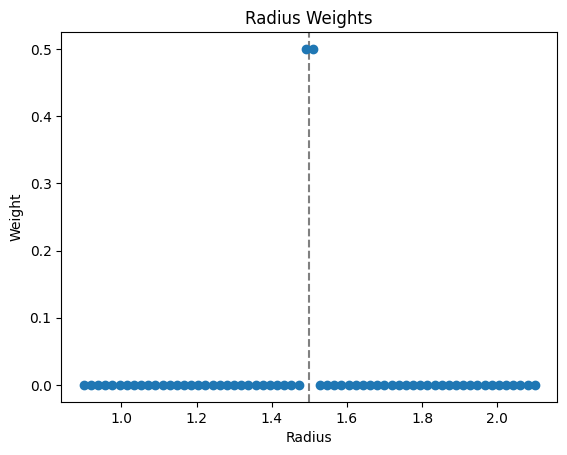

In [18]:
RADII = jnp.linspace(0.9, 2.1, 64)

target_position = 1.5
radius_rbf_variance = 1e-5
radius_weights = loss.target_position_to_radius_weights(
    target_position, radius_rbf_variance, RADII
)
# The width is the distance between the first and last non-zero weights
width = RADII[radius_weights > 1e-3][-1] - RADII[radius_weights > 1e-3][0]
print(width)
assert width < 0.2


import matplotlib.pyplot as plt
plt.axvline(target_position, color="gray", linestyle="--")
plt.plot(RADII, radius_weights, 'o')
plt.title("Radius Weights")
plt.xlabel("Radius")
plt.ylabel("Weight")
plt.show()